Taller 3 - métodos computacionales

1. Carros en un plano inclinado

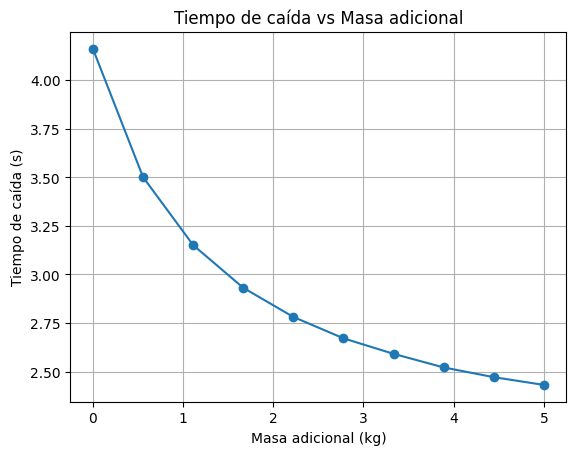

In [1]:
#MARCO DE REFERENCIA ALINEADO AL PLANO
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81  
theta = np.radians(30)  
gamma = 0.7 
m_carro = 1.0  
Ms = np.linspace(0, 5, 10)  
H = 10.0  #hipotenusa

#ecuación diferencial
def sistema(t, y, m_total):
    x, v = y  
    a = (m_total * g * np.sin(theta) - gamma * v**2) / m_total
    return [v, a]

#solución de la ecuación
tiempo_max = 5 
tiempos = []

for M in Ms:
    sol = solve_ivp(sistema, t_span=[0, 10], y0=[0, 0], args=(m_carro + M,), max_step=0.01)
    for i in range(len(sol.t)):
        if sol.y[0][i] >= H:  #miro cuando la posición es mayor que H
            tiempo_caida = sol.t[i] #guardo ese tiempo (el de caida)
            break
    tiempos.append(tiempo_caida)

plt.plot(Ms, tiempos, 'o-')
plt.xlabel('Masa adicional (kg)')
plt.ylabel('Tiempo de caída (s)')
plt.title('Tiempo de caída vs Masa adicional')
plt.grid(True)
plt.show()

¿el tiempo de caída de los carros depende de la masa que llevan encima? si

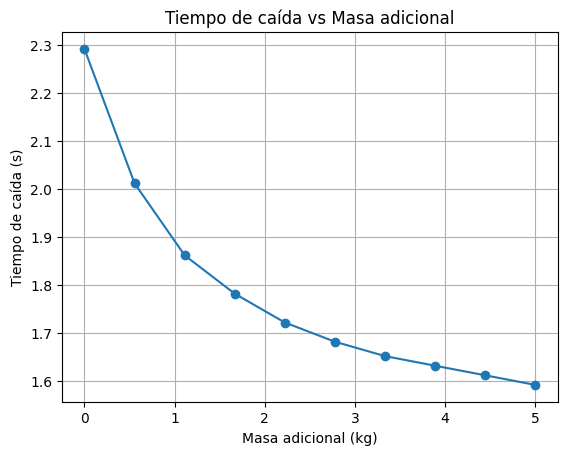

In [2]:
#MARCO DE REFERENCIA RECTO
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81  
theta = np.radians(30)  
gamma = 0.7 
m_carro = 1.0  
Ms = np.linspace(0, 5, 10)  
H = 10.0  #altura

#ecuación diferencial
def sistemaX(t, y, m_total):
    x, v = y  
    a = ((-gamma*v**2*np.cos(theta))/m_total) + ((m_total*g*np.cos(30)*np.sin(30))/m_total)
    return [v, a]

def sistemaY(t, y, m_total):
    x, v = y  
    a = -g + ((gamma*v**2*np.sin(theta))/m_total) + ((m_total*g*np.cos(30)*np.cos(30))/m_total)
    return [v, a]

#solución de la ecuación
tiempo_max = 5 

for M in Ms:
    solX = solve_ivp(sistemaX, t_span=[0, 10], y0=[0, 0], args=(m_carro + M,), max_step=0.01)
    
tiempos = []
for M in Ms:
    solY = solve_ivp(sistemaY, t_span=[0, 10], y0=[H, 0], args=(m_carro + M,), max_step=0.01)
    for i in range(len(sol.t)):
        if solY.y[0][i] <= 0:  #miro cuando la posición es mayor que H
            tiempo_caida = sol.t[i] #guardo ese tiempo (el de caida)
            break
    tiempos.append(tiempo_caida)

plt.plot(Ms, tiempos, 'o-')
plt.xlabel('Masa adicional (kg)')
plt.ylabel('Tiempo de caída (s)')
plt.title('Tiempo de caída vs Masa adicional')
plt.grid(True)
plt.show()